# 1. Library and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro
from scipy.stats import bartlett
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

df=pd.read_csv('../DAT/정밀가공_품질보증_데이터셋.csv', encoding='CP949')
df

,SerialNo,ReceivedDateTime,SpindleSpeed_max,ServoCurrent_X_max,ServoCurrent_Z1_max,ServoCurrent_Z2_max,ServoCurrent_Z3_max,ServoLoad_X_max,ServoLoad_Z1_max,ServoLoad_Z2_max,...,ServoCurrent_Z3_std,ServoLoad_X_std,ServoLoad_Z1_std,ServoLoad_Z2_std,ServoLoad_Z3_std,SpindleLoad_max,SpindleLoad_mean,SpindleLoad_min,SpindleLoad_std,passorfail
0,20220823-0000185,2022-08-23 03:14:36.906,2227.05,1429.1500,1364.51,30.3,4188.47,118.17,85.85,30.3,...,482.595381,19.046612,13.226897,0.0,478.681055,31398.312380,4271.395985,0.0,5320.503114,0
1,20220823-0000186,2022-08-23 03:14:37.884,2227.05,1510.9600,3144.13,30.3,4188.47,154.53,173.72,30.3,...,568.919411,21.173073,18.608439,0.0,59.504038,32008.193810,3241.446411,0.0,5001.031891,0
2,20220823-0000187,2022-08-23 03:15:50.892,2227.05,1068.5800,3144.13,30.3,4579.34,147.46,93.93,30.3,...,363.842687,18.603881,12.620133,0.0,46.232507,31502.089880,3515.539294,0.0,4963.334281,0
3,20220823-0000188,2022-08-23 03:17:13.888,2224.02,937.2800,2377.54,30.3,4183.42,184.83,220.18,30.3,...,479.244638,22.790164,23.841988,0.0,479.783979,31207.895060,3391.720514,0.0,4736.149889,0
4,20220823-0000189,2022-08-23 03:18:26.904,2225.03,681.7500,2377.54,30.3,4556.11,177.76,220.18,30.3,...,492.930251,21.737386,24.969696,0.0,337.164170,32091.013810,3114.918299,0.0,4825.433523,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,20220825-0000517,2022-08-25 10:11:00.099,2226.04,1123.1200,2908.80,30.3,4685.39,79.79,85.85,30.3,...,538.033991,14.532176,14.142291,0.0,62.912823,31598.765060,3610.149090,0.0,5021.485569,0
1081,20220825-0000518,2022-08-25 10:12:14.102,2227.05,910.0100,2434.10,30.3,4401.58,141.40,81.81,30.3,...,495.464909,18.358585,12.142978,0.0,44.714905,32001.787380,3598.271657,0.0,4997.717833,0
1082,20220825-0000518,2022-08-25 10:12:14.102,2227.05,891.8098,2434.10,30.3,4401.58,141.40,81.81,30.3,...,495.464909,19.276514,12.142978,0.0,46.950651,33601.876749,3490.323508,0.0,5247.603724,1
1083,20220825-0000519,2022-08-25 10:13:31.111,2223.01,1217.0500,2934.05,30.3,4646.00,153.52,81.81,30.3,...,535.382293,21.134500,13.407021,0.0,477.148416,31935.947500,3545.539778,0.0,4911.028977,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SerialNo              1085 non-null   object 
 1   ReceivedDateTime      1085 non-null   object 
 2   SpindleSpeed_max      1085 non-null   float64
 3   ServoCurrent_X_max    1085 non-null   float64
 4   ServoCurrent_Z1_max   1085 non-null   float64
 5   ServoCurrent_Z2_max   1085 non-null   float64
 6   ServoCurrent_Z3_max   1085 non-null   float64
 7   ServoLoad_X_max       1085 non-null   float64
 8   ServoLoad_Z1_max      1085 non-null   float64
 9   ServoLoad_Z2_max      1085 non-null   float64
 10  ServoLoad_Z3_max      1085 non-null   float64
 11  SpindleSpeed_mean     1085 non-null   float64
 12  ServoCurrent_X_mean   1085 non-null   float64
 13  ServoCurrent_Z1_mean  1085 non-null   float64
 14  ServoCurrent_Z2_mean  1085 non-null   float64
 15  ServoCurrent_Z3_mean 

# 2. Data preprocessing

### 데이터 품질 지수를 기준으로
- 완전성 품질지수
- 유일성 품질지수
- 유효성 품질지수
- 일관성 품질지수
- 정확성 품질지수
- 무결성 품질지수

### 2.1 완전성 품질 지수
- 완전성 품질 지수 = (1 - 결측 데이터의 개수 / 전체 데이터의 개수) * 100
- 결측 데이터 값이 30% 이상인 데이터들은 데이터의 완전성을 떨어뜨리기 때문에 각 열(column)에 대한 결측 데이터 값의 비율을 확인하여 삭제

* 결과 : 각 변수의 완전성 품질 지수는 모두 100%로 결측치는 발견되지 않았다.

In [3]:
print('변수별 완전성 품질 지수')
print('---------------------------------')
print((1-(df.isna().sum()/len(df))) * 100)
print('---------------------------------')

변수별 완전성 품질 지수
---------------------------------
SerialNo                100.0
ReceivedDateTime        100.0
SpindleSpeed_max        100.0
ServoCurrent_X_max      100.0
ServoCurrent_Z1_max     100.0
ServoCurrent_Z2_max     100.0
ServoCurrent_Z3_max     100.0
ServoLoad_X_max         100.0
ServoLoad_Z1_max        100.0
ServoLoad_Z2_max        100.0
ServoLoad_Z3_max        100.0
SpindleSpeed_mean       100.0
ServoCurrent_X_mean     100.0
ServoCurrent_Z1_mean    100.0
ServoCurrent_Z2_mean    100.0
ServoCurrent_Z3_mean    100.0
ServoLoad_X_mean        100.0
ServoLoad_Z1_mean       100.0
ServoLoad_Z2_mean       100.0
ServoLoad_Z3_mean       100.0
SpindleSpeed_min        100.0
ServoCurrent_X_min      100.0
ServoCurrent_Z1_min     100.0
ServoCurrent_Z2_min     100.0
ServoCurrent_Z3_min     100.0
ServoLoad_X_min         100.0
ServoLoad_Z1_min        100.0
ServoLoad_Z2_min        100.0
ServoLoad_Z3_min        100.0
SpindleSpeed_std        100.0
ServoCurrent_X_std      100.0
ServoCurrent_Z1_std   

### 2.2 유일성 품질 지수
- 유일성 품질 지수   
  = (유일한 데이터 개수 / 전체 데이터의 개수) * 100
- 유일성 품질 지수가 100이 아닐 경우, 중복되는 데이터를 적절히 처리하는 것이 필요

* 결과 : SerialNo의 유일성 품질 지수는 약 91%정도로 나타남
- 일부 제품의 SerialNo, ReceivedDateTime이 바로 이전 시점에 생산된 제품의 SerialNo, ReceivedDateTime과 중복되는 것을 확인하였다. 이러한 제품의 특징은 불량제품(passorfail = 1)이라는 특징을 가지고 있었으며, 불량으로 판정된 제품은 이전 시점의 SerialNo, ReceivedDateTime의 값을 그대로 쓴다고 판단하였다.
- 분석에 사용되지 않을 'SerialNo', 'ReceivedDateTime' 변수의 값을 제외하고, 중복된 행들의 나머지 변수의 값들은 차이가 존재하였으므로, 유일성 품질 지수를 높이기 위한 처리는 따로 진행하지 않았다.      

In [4]:
print('기본키(SerialNo)의 유일성 품질지수')
print('----------------------------------------------------------------------------')
print('SerialNo 변수의 유일성 품질지수 : ', (df['SerialNo'].nunique()/len(df)) * 100)
print('----------------------------------------------------------------------------')

기본키(SerialNo)의 유일성 품질지수
----------------------------------------------------------------------------
SerialNo 변수의 유일성 품질지수 :  90.87557603686636
----------------------------------------------------------------------------


'SerialNo', 'ReceivedDateTime' 변수를 기준으로 중복되는 행을 확인한 결과, 'SerialNo', 'ReceivedDateTime' 값이 일치하는 행이 2개씩 존재하였으며, 모두 양품 1, 불량품 1로 구성되어 있었다.

In [5]:
df[df.duplicated(['SerialNo', 'ReceivedDateTime'], keep=False)]

,SerialNo,ReceivedDateTime,SpindleSpeed_max,ServoCurrent_X_max,ServoCurrent_Z1_max,ServoCurrent_Z2_max,ServoCurrent_Z3_max,ServoLoad_X_max,ServoLoad_Z1_max,ServoLoad_Z2_max,...,ServoCurrent_Z3_std,ServoLoad_X_std,ServoLoad_Z1_std,ServoLoad_Z2_std,ServoLoad_Z3_std,SpindleLoad_max,SpindleLoad_mean,SpindleLoad_min,SpindleLoad_std,passorfail
23,20220823-0000210,2022-08-23 03:44:05.884,2228.06000,1064.5400,3112.82,30.3,4613.68,162.61,206.04,30.3,...,592.065495,20.093911,28.415543,0.0,333.459816,31397.427620,3276.599178,0.0,4775.551987,0
24,20220823-0000210,2022-08-23 03:44:05.884,2216.91970,1117.7670,3112.82,30.3,4613.68,162.61,206.04,30.3,...,592.065495,22.103302,28.415543,0.0,366.805798,31711.401896,2948.939261,0.0,5253.107185,1
31,20220823-0000219,2022-08-23 03:54:14.872,2227.05000,1433.1900,2275.53,30.3,4192.51,185.84,176.75,30.3,...,432.452902,21.332527,21.664753,0.0,306.507423,31287.085120,3284.087751,0.0,4853.184462,0
32,20220823-0000219,2022-08-23 03:54:14.872,2215.91475,1504.8495,2275.53,30.3,4192.51,185.84,176.75,30.3,...,432.452902,23.465779,21.664753,0.0,337.158166,31599.955971,2955.678976,0.0,5338.502908,1
41,20220823-0000231,2022-08-23 04:08:24.375,2223.01000,1406.9300,2493.69,30.3,480.76,116.15,108.07,30.3,...,61.566135,17.599228,15.102765,0.0,345.241545,31930.534910,3310.636301,0.0,5040.398980,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,20220825-0000493,2022-08-25 09:43:01.618,2226.04000,644.3598,1937.18,30.3,4182.41,181.80,214.12,30.3,...,326.865639,21.147211,24.058393,0.0,56.801364,33365.003469,3578.940999,0.0,5404.331786,1
1068,20220825-0000504,2022-08-25 09:55:29.610,2224.02000,768.6100,1793.76,30.3,477.73,116.15,75.75,30.3,...,95.064870,18.208434,9.832014,0.0,74.713635,31286.675060,3595.969705,0.0,4976.481858,0
1069,20220825-0000504,2022-08-25 09:55:29.610,2224.02000,753.2378,1793.76,30.3,477.73,116.15,75.75,30.3,...,95.064870,19.118856,9.832014,0.0,78.449316,32851.008813,3488.090614,0.0,5225.305951,1
1081,20220825-0000518,2022-08-25 10:12:14.102,2227.05000,910.0100,2434.10,30.3,4401.58,141.40,81.81,30.3,...,495.464909,18.358585,12.142978,0.0,44.714905,32001.787380,3598.271657,0.0,4997.717833,0


In [6]:
df[df.duplicated(['SerialNo', 'ReceivedDateTime'], keep=False)]['passorfail'].value_counts()

0    99
1    99
Name: passorfail, dtype: int64

### 2.3 유효성 품질 지수
- 유효성 품질 지수   
  = (유효성을 만족한 데이터의 개수 / 전체 데이터의 개수) * 100
- 해당 데이터는 2022년 8월 23일부터 2022년 8월 27일까지 수집된 데이터이므로, 데이터가 해당 기간을 벗어나지 않는지 확인해야 한다.

- 결과 : 데이터가 수집된 기간 내에 수집된 것을 확인하였으므로, 유효성 품질 지수는 100%로 나타났다.

In [7]:
import datetime
df.ReceivedDateTime = pd.to_datetime(df.ReceivedDateTime)
start_date = pd.Timestamp(datetime.date(2022, 8, 23))
end_date = pd.Timestamp(datetime.date(2022, 8, 28))
valid_df = df[(df.ReceivedDateTime >= start_date) & (df.ReceivedDateTime < end_date)]
valid_df_len = len(valid_df)
print('데이터 유효성 지수 : {}%'.format(valid_df_len/len(df) * 100))

데이터 유효성 지수 : 100.0%


### 2.4 일관성 품질 지수
- 일관성 품질 지수   
  = (일관성을 만족한 데이터의 개수 / 전체 데이터의 개수) * 100

* 결과 : 공정 데이터 값들의 형태가 float64임을 확인하였다. 따라서 본 데이터의 일관성 품질지수는 100%로 나타났다.

In [8]:
df1=df.copy()

In [9]:
for column in df1.columns:
    if df1[column].dtype =='int64':
        df1[column]=df1[column].apply(lambda x:isinstance(x,int))
    if df1[column].dtype =='float64':
        df1[column]=df1[column].apply(lambda x:isinstance(x,float))
valid = len(df1)/len(df1)*100
print(f"데이터 일관성 지수 : {valid}%")

데이터 일관성 지수 : 100.0%


### 2.5 정확성 품질 지수
- 정확성 품질 지수   
  = {1-(정확성에 위배되는 데이터의 개수 / 전체 데이터의 개수)} * 100
- 양품수량과 불량수량의 총합이 총수량과 동일 여부 확인을 통해 정확성 품질 지수 확인 가능

- 결과 : 양품수량과 불량수량의 총합이 총수량과 동일하므로, 정확성 품질 지수는 100%임을 확인할 수 있다.

In [10]:
success=len(df[df['passorfail']==0])
fail=len(df[df['passorfail']==1])
total=len(df['passorfail'])
if success + fail == total:
    print('양품 수량 : ', success)
    print('불량 수량 : ', fail)
    print('양품 수량 + 불량 수량 : ', success + fail)
    print('총수량 : ', total)
    print('정확성 품질지수 : 100%')

양품 수량 :  986
불량 수량 :  99
양품 수량 + 불량 수량 :  1085
총수량 :  1085
정확성 품질지수 : 100%


### 2.6 무결성 품질 지수
- 무결성 품질 지수   
  = {1-(유일성, 유효성, 일관성 중 100%가 아닌 지수 / 3)} * 100
- 유효성, 일관성의 지수는 100%, 유일성의 지수는 90.9%로 나타남
- 결과 : 3개의 지수 중 하나의 지수만 100%를 만족하지 못하므로, 무결성 품질지수는 66.7%로 나타났다.

# 3.Data visualization(EDA)

### 3.1 양품/불량 집단 별 변수별 분포 확인(히스토그램)

- 특정한 하나의 값만을 갖는 변수들을 제거할 필요가 있다.

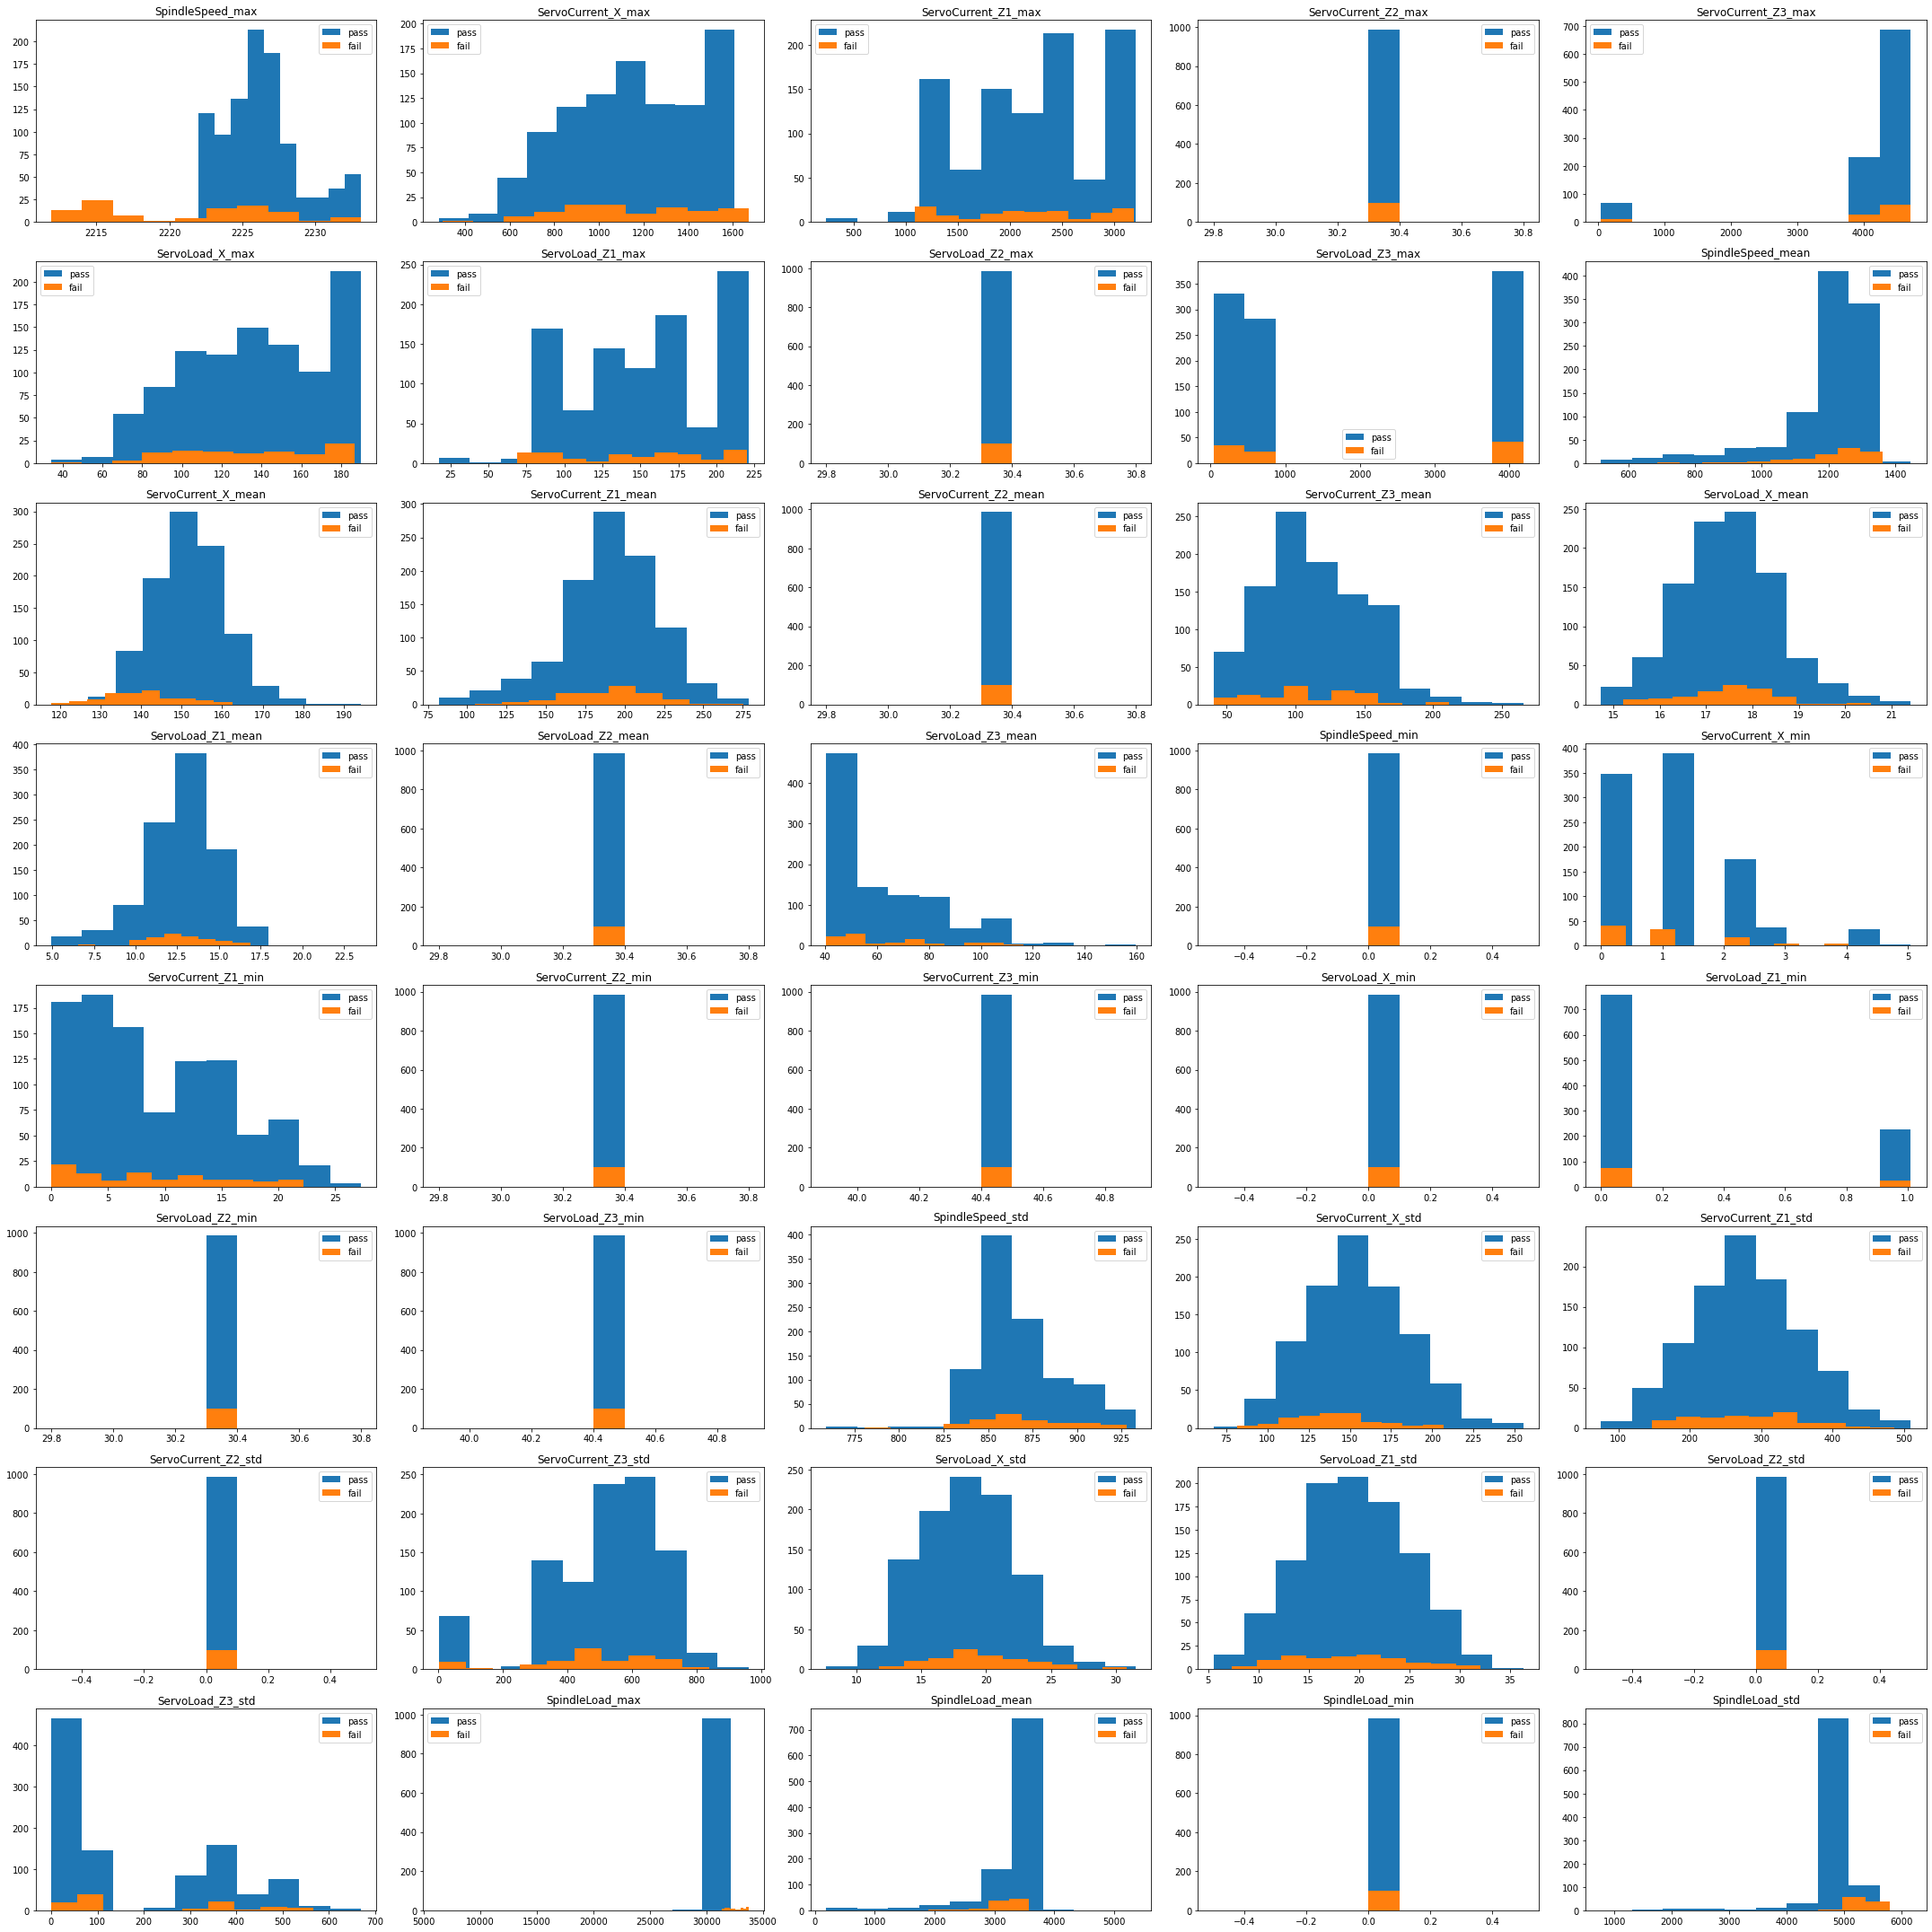

In [11]:
cols = df.columns.tolist()
plt.figure(figsize=(30,30))
pos_df = df[df['passorfail']==0]
neg_df = df[df['passorfail']==1]
for i in range(len(cols)):
    if (cols[i] != 'SerialNo') & (cols[i] != 'ReceivedDateTime') & (cols[i] != 'passorfail'):
        plt.subplot(8, 5, i-1)
        plt.title(cols[i])
        plt.hist(pos_df[cols[i]], label='pass')
        plt.hist(neg_df[cols[i]], label='fail')
        plt.legend()
plt.tight_layout()
plt.savefig('독립변수의 히스토그램.png')

In [12]:
df=df.drop(columns=[col for col in df.columns if df[col].nunique() == 1])

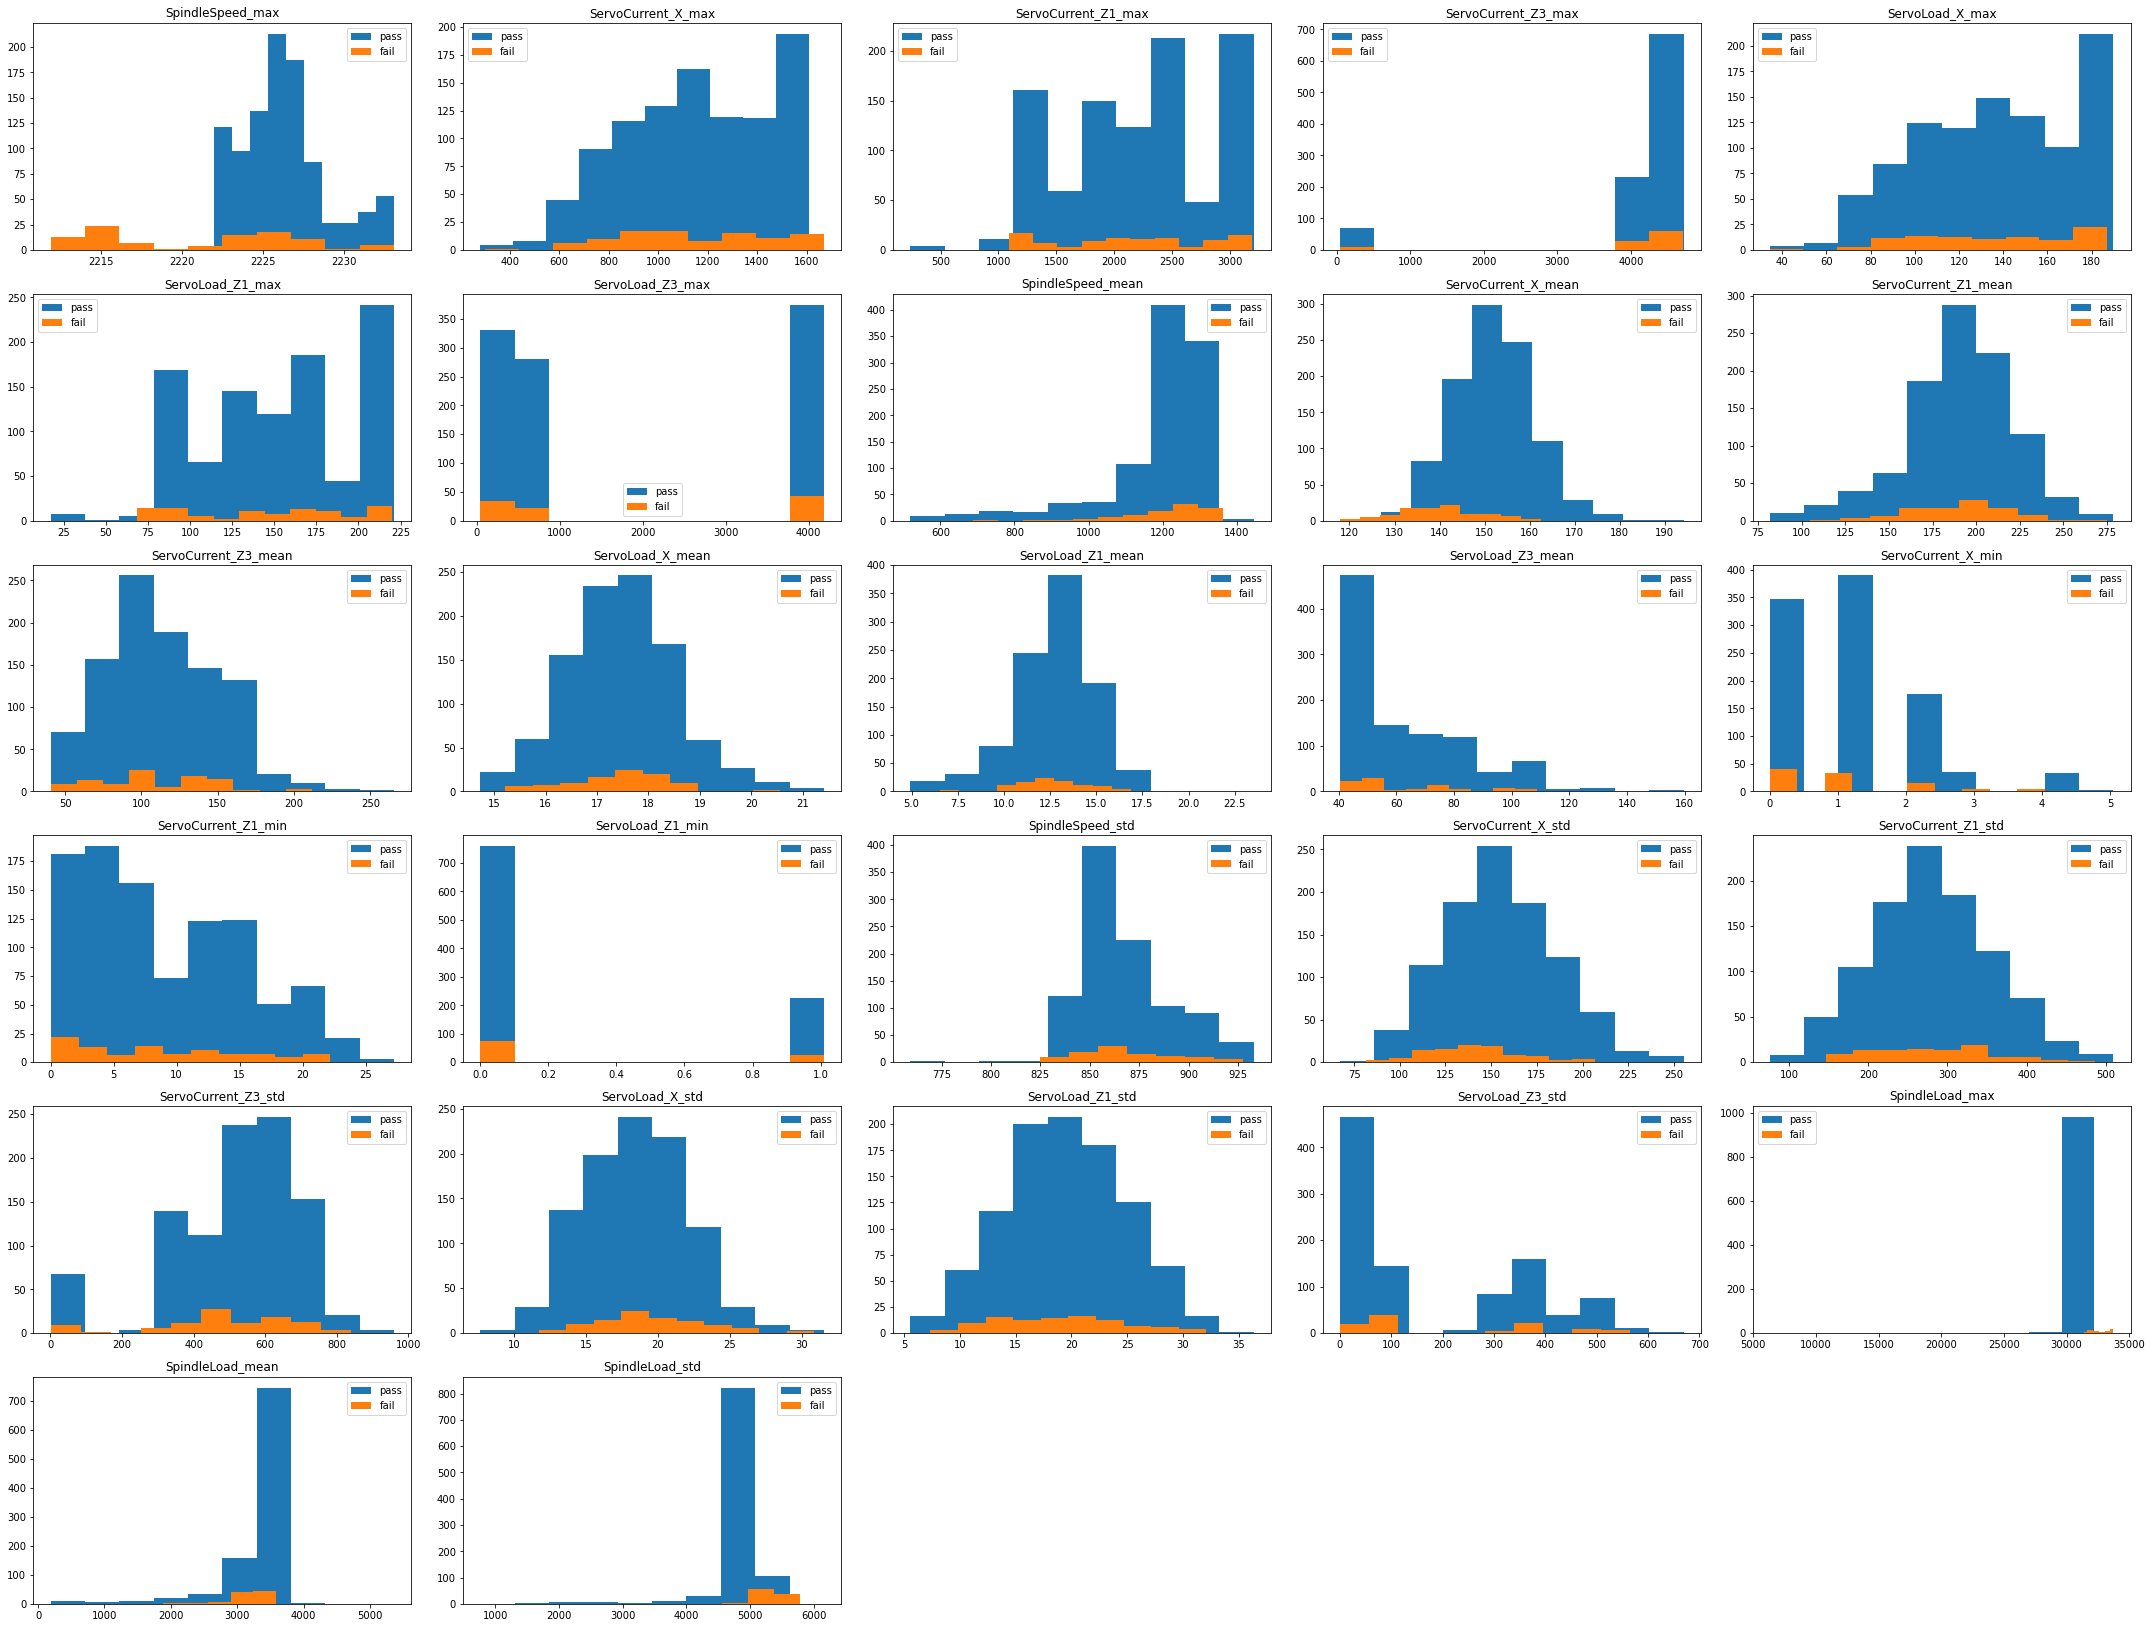

In [13]:
cols = df.columns.tolist()
plt.figure(figsize=(30,30))
pos_df = df[df['passorfail']==0]
neg_df = df[df['passorfail']==1]
for i in range(len(cols)):
    if (cols[i] != 'SerialNo') & (cols[i] != 'ReceivedDateTime') & (cols[i] != 'passorfail'):
        plt.subplot(8, 5, i-1)
        plt.title(cols[i])
        plt.hist(pos_df[cols[i]], label='pass')
        plt.hist(neg_df[cols[i]], label='fail')
        plt.legend()
plt.tight_layout()
plt.savefig('독립변수의 히스토그램(변수 제거 후).png')

### 3.3 양품과 불량품 집단의 분포(평균) 비교

평균 비교를 위해 T-test 검정을 사용하며, 검정에 앞서 다음 가정을 만족하는지 확인해야 한다.
- 정규성
- 등분산성

In [14]:
df=df.drop(columns=['SerialNo', 'ReceivedDateTime'])
df_success=df[df['passorfail']==0]
df_fail=df[df['passorfail']==1]

#### 1. 정규성 검정 결과 (Shapiro-Wilk 검정)  
- 불량품 집단은 정규성 가정을 만족하는 변수들이 상당 수 존재하지만, 양품 집단의 변수들은 대부분 정규성 가정을 만족하지 못하는 것으로 드러났다.
- 그러나 중심극한정리에 의해, 표본 수가 충분히 크므로(30개 이상) 각 집단의 변수들은 모두 정규성을 만족한다고 볼 수 있다.  
- 따라서 모수적 방법인 T-test 검정과 비모수적인 방법인 Mann-whitney U검정을 통해, 분포의 차이가 존재하는 변수를 독립변수로 선택하는 것을 고려하였다.  
  
#### 2. 등분산 검정 결과(bartlett 검정)
- 대부분의 변수들이 양품, 불량품 집단에 대해 등분산 가정을 채택하는 것으로 드러났다.

In [17]:
def normality_test(data):
    nomality=[]
    nonnomality=[]
    alpha = 0.05
    for col in data.columns:
        stat, p_value = shapiro(data[col])
        if p_value > alpha:
            nomality.append(col)
        else:
            nonnomality.append(col)
    return nomality, nonnomality
nomality1, nonnomality1=normality_test(df_success)
nomality2, nonnomality2=normality_test(df_fail)
print('양품 집단의 정규성을 만족하는 변수')
print(': ', nomality1)
print()
print('불량품 집단의 정규성을 만족하는 변수')
print(': ', nomality2)

양품 집단의 정규성을 만족하는 변수
:  ['ServoLoad_Z1_std', 'passorfail']

불량품 집단의 정규성을 만족하는 변수
:  ['ServoCurrent_X_mean', 'ServoCurrent_Z1_mean', 'ServoLoad_X_mean', 'ServoLoad_Z1_mean', 'ServoCurrent_X_std', 'ServoCurrent_Z1_std', 'ServoLoad_X_std', 'ServoLoad_Z1_std', 'passorfail']


In [18]:
def bartlett_test(data1, data2):
    same=[]
    diff=[]
    alpha = 0.05
    for col in data1.columns:
        stat, p_value = bartlett(data1[col], data2[col])
        if p_value < alpha:
            diff.append(col)
        else:
            same.append(col)
    return diff, same
diff, same=bartlett_test(df_success, df_fail)

print('양품 집단과 불량품 집단의 등분산성을 만족하는 변수')
print(': ', same)
print()
print('양품 집단과 불량품 집단의 등분산성을 만족하지 않는 변수')
print(': ', diff)

양품 집단과 불량품 집단의 등분산성을 만족하는 변수
:  ['ServoCurrent_X_max', 'ServoCurrent_Z1_max', 'ServoLoad_X_max', 'ServoLoad_Z1_max', 'ServoLoad_Z3_max', 'SpindleSpeed_mean', 'ServoCurrent_X_mean', 'ServoCurrent_Z1_mean', 'ServoCurrent_Z3_mean', 'ServoLoad_X_mean', 'ServoLoad_Z1_mean', 'ServoLoad_Z3_mean', 'ServoCurrent_X_min', 'ServoCurrent_Z1_min', 'ServoLoad_Z1_min', 'SpindleSpeed_std', 'ServoCurrent_X_std', 'ServoCurrent_Z1_std', 'ServoCurrent_Z3_std', 'ServoLoad_X_std', 'ServoLoad_Z1_std', 'ServoLoad_Z3_std', 'SpindleLoad_mean', 'passorfail']

양품 집단과 불량품 집단의 등분산성을 만족하지 않는 변수
:  ['SpindleSpeed_max', 'ServoCurrent_Z3_max', 'SpindleLoad_max', 'SpindleLoad_std']


#### 3. 모수적 검정방법(T-test)
- 등분산 가정을 만족하는 변수와 만족하지 않는 변수를 나누어 각각 T-test 검정을 진행하였다.
- 'ServoCurrent_X_mean', 'ServoCurrent_X_std', 'ServoLoad_X_std', 'SpindleLoad_mean', 'passorfail', 'SpindleSpeed_max', 'SpindleLoad_max', 'SpindleLoad_std' 변수에서 두 집단의 차이가 있는 것으로 나타났다.

In [19]:
def t_test(data1, data2):
    h0=[]
    h1=[]
    alpha = 0.05
    for col in same: 
        statistic, p_value = ttest_ind(data1[col], data2[col], equal_var=True)
        if p_value < alpha:
            h1.append(col)
        else:
            h0.append(col)
    for col in diff:
        statistic, p_value = ttest_ind(data1[col], data2[col], equal_var=False)
        if p_value < alpha:
            h1.append(col)
        else:
            h0.append(col)        
    return h0,h1
t_h0,t_h1=t_test(df_success, df_fail)
print('두 집단에 차이가 있는 변수')
print(': ', t_h1)

두 집단에 차이가 있는 변수
:  ['ServoCurrent_X_mean', 'ServoCurrent_X_std', 'ServoLoad_X_std', 'SpindleLoad_mean', 'passorfail', 'SpindleSpeed_max', 'SpindleLoad_max', 'SpindleLoad_std']


#### 4. 비모수적 검정방법(Mann-Whitney U)  
- 'SpindleSpeed_max','ServoCurrent_Z3_max','ServoCurrent_X_mean','ServoCurrent_X_std' ,'ServoLoad_X_std','ServoLoad_Z3_std','SpindleLoad_max','SpindleLoad_mean','SpindleLoad_std' 변수에서 두 집단의 차이가 있는 것으로 나타났다.

In [20]:
def mann_whitney_u_test(data1, data2):
    h0=[]
    h1=[]
    alpha = 0.05
    for col in data1.columns:
        statistic, p_value = mannwhitneyu(data1[col], data2[col])
        if p_value < alpha:
            h1.append(col)
        else:
            h0.append(col)
    return h0,h1
u_h0,u_h1=mann_whitney_u_test(df_success, df_fail)
print('두 집단에 차이가 있는 변수')
print(': ', u_h1)

두 집단에 차이가 있는 변수
:  ['SpindleSpeed_max', 'ServoCurrent_Z3_max', 'ServoCurrent_X_mean', 'ServoCurrent_X_std', 'ServoLoad_X_std', 'ServoLoad_Z3_std', 'SpindleLoad_max', 'SpindleLoad_mean', 'SpindleLoad_std', 'passorfail']


#### 5. 두 집단(양품 / 불량품)에 차이가 있다고 판단된 변수

In [21]:
variable = list(set(t_h1 + u_h1))
variable

['ServoLoad_X_std',
 'ServoCurrent_X_mean',
 'ServoLoad_Z3_std',
 'SpindleLoad_std',
 'SpindleSpeed_max',
 'ServoCurrent_X_std',
 'SpindleLoad_max',
 'passorfail',
 'SpindleLoad_mean',
 'ServoCurrent_Z3_max']

In [22]:
df=df[variable]
df

,ServoLoad_X_std,ServoCurrent_X_mean,ServoLoad_Z3_std,SpindleLoad_std,SpindleSpeed_max,ServoCurrent_X_std,SpindleLoad_max,passorfail,SpindleLoad_mean,ServoCurrent_Z3_max
0,19.046612,158.419865,478.681055,5320.503114,2227.05,196.189122,31398.312380,0,4271.395985,4188.47
1,21.173073,151.364038,59.504038,5001.031891,2227.05,170.418506,32008.193810,0,3241.446411,4188.47
2,18.603881,143.857452,46.232507,4963.334281,2227.05,134.337028,31502.089880,0,3515.539294,4579.34
3,22.790164,145.801689,479.783979,4736.149889,2224.02,139.374693,31207.895060,0,3391.720514,4183.42
4,21.737386,144.099935,337.164170,4825.433523,2225.03,115.061105,32091.013810,0,3114.918299,4556.11
...,...,...,...,...,...,...,...,...,...,...
1080,14.532176,155.417162,62.912823,5021.485569,2226.04,160.269445,31598.765060,0,3610.149090,4685.39
1081,18.358585,157.704286,44.714905,4997.717833,2227.05,154.846370,32001.787380,0,3598.271657,4401.58
1082,19.276514,152.973157,46.950651,5247.603724,2227.05,150.200979,33601.876749,1,3490.323508,4401.58
1083,21.134500,178.064384,477.148416,4911.028977,2223.01,191.038710,31935.947500,0,3545.539778,4646.00


#### 3.3 이상치 확인

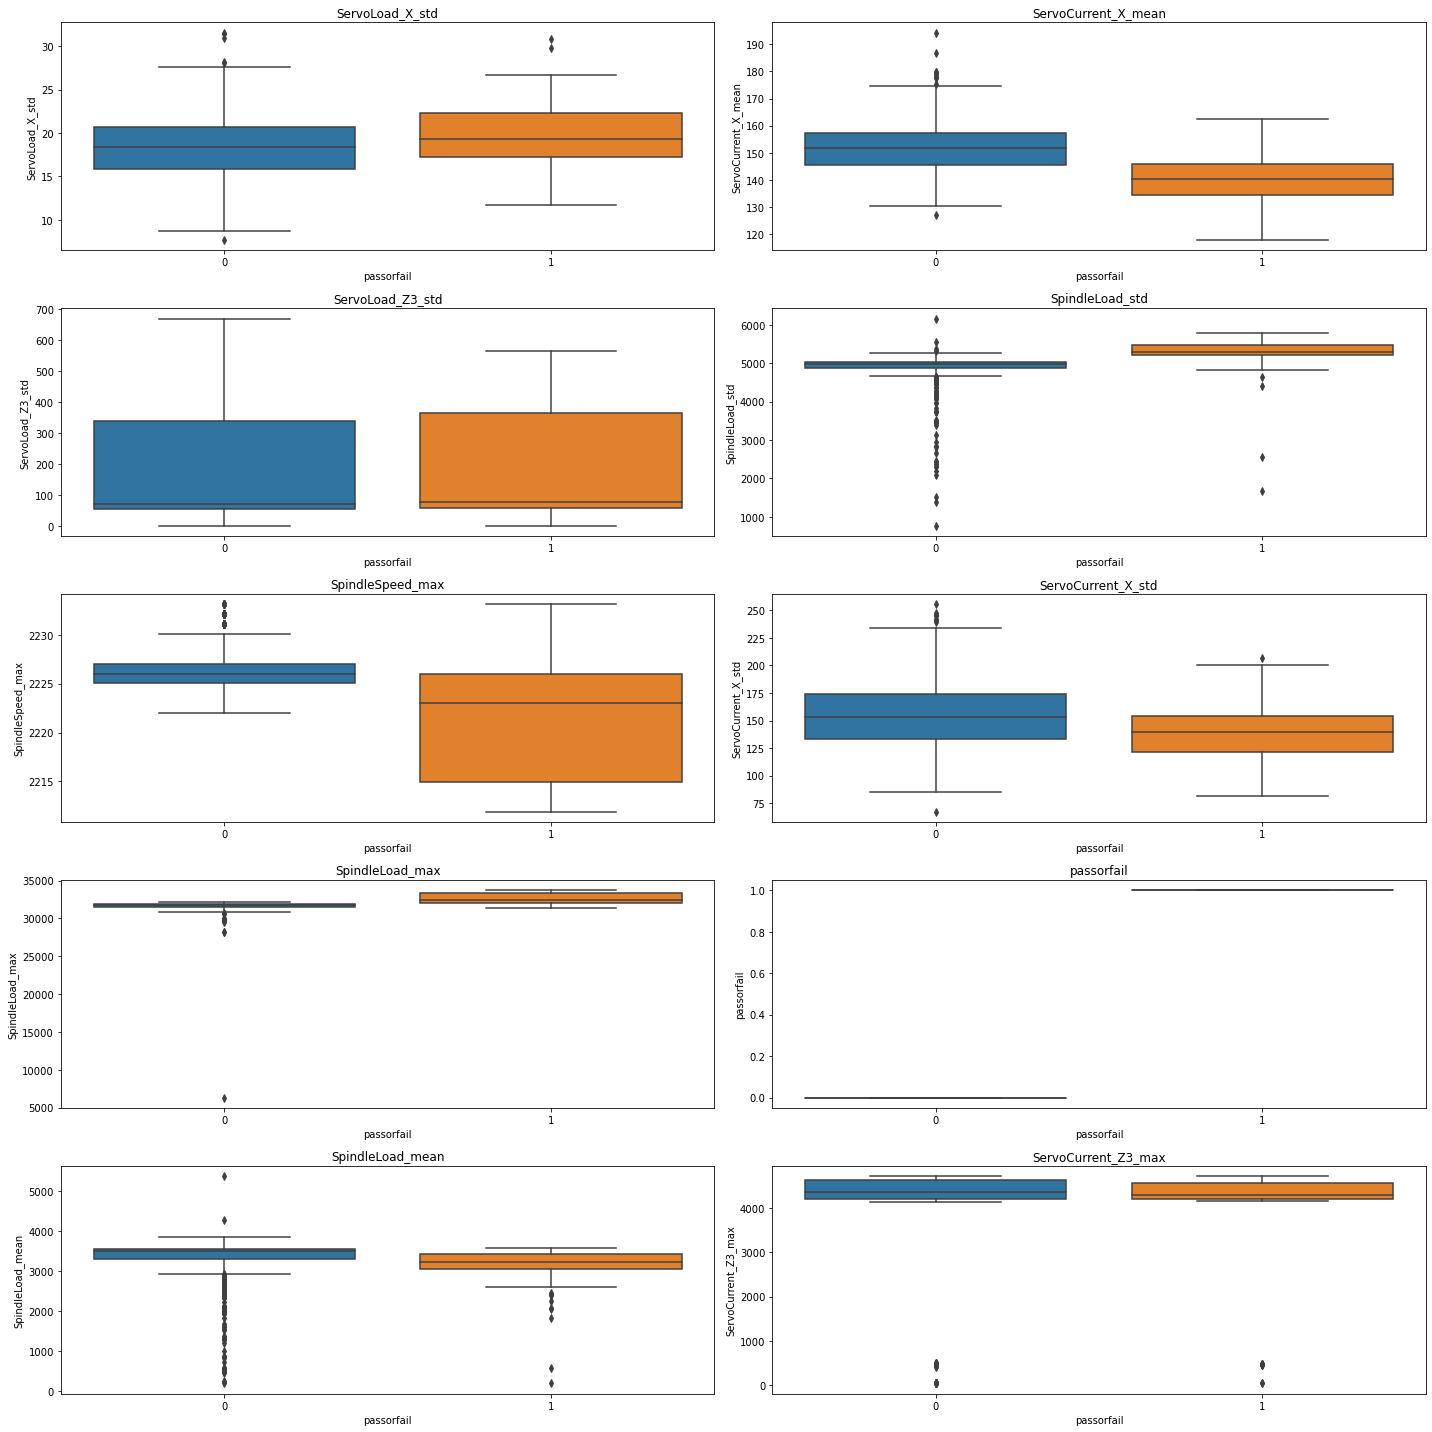

<Figure size 432x288 with 0 Axes>

In [23]:
cols = df.columns.tolist()
plt.figure(figsize=(20,20))
for i in range(len(cols)):
    plt.subplot(5, 2, i+1)
    sns.boxplot(x=df['passorfail'], y=df[cols[i]])
    plt.title(cols[i])
plt.tight_layout()
plt.show()
plt.savefig('변수 이상치 탐색.png')

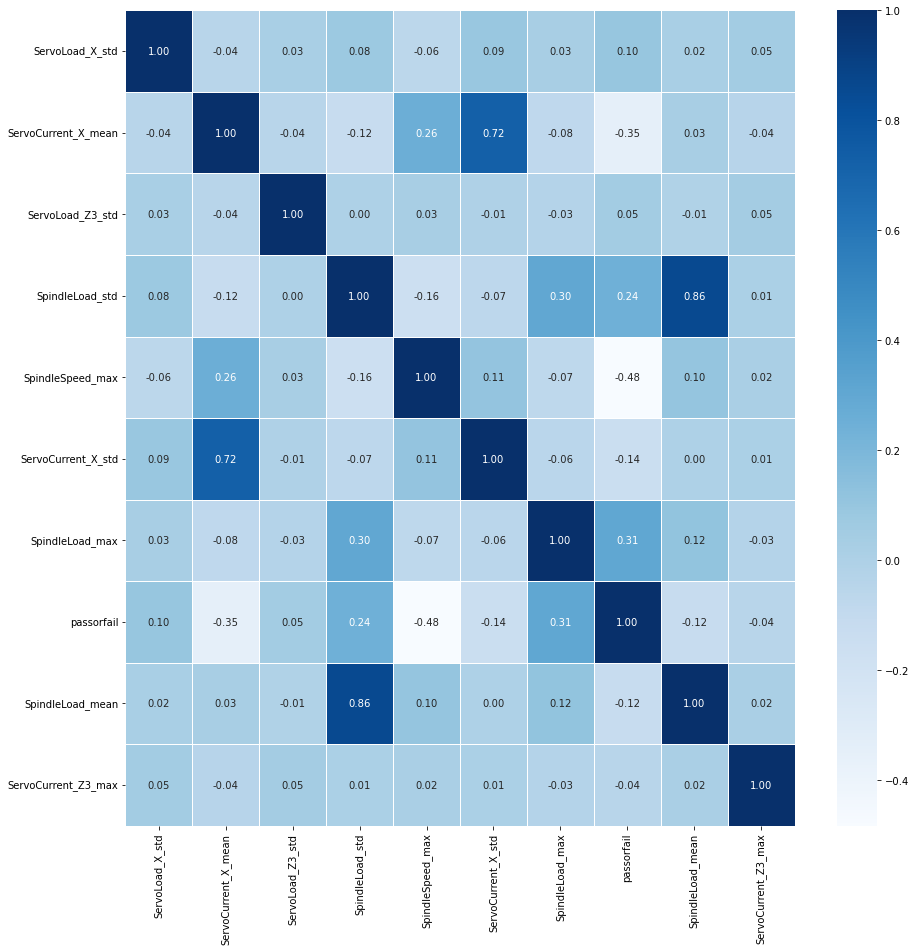

In [24]:
plt.figure(figsize=(15,15))
sns.heatmap(data=df.corr(), annot=True, fmt='.2f', linewidths=0.5, cmap='Blues')
plt.savefig('변수 상관관계 heatmap.png')

# 4. modeling

In [25]:
X=df.drop(columns='passorfail')
y=df['passorfail']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [28]:
import xgboost as xgb
model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

# 5. Inference & Conclusion

#### Accuracy

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9953917050691244


#### Confusion Matrix

In [30]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[190   0]
 [  1  26]]


#### Classification report

In [31]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       190
           1       1.00      0.96      0.98        27

    accuracy                           1.00       217
   macro avg       1.00      0.98      0.99       217
weighted avg       1.00      1.00      1.00       217



#### Explainable AI

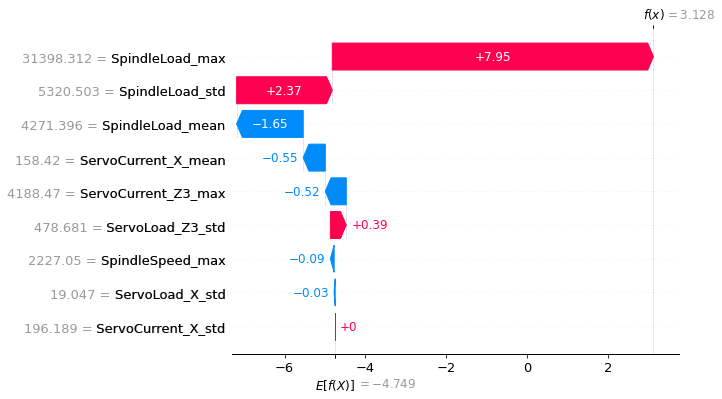

<Figure size 432x288 with 0 Axes>

In [32]:
import shap
ex = shap.Explainer(model)
shap_v = ex(X)
shap.plots.waterfall(shap_v[0])
plt.savefig('shap1.png')

In [33]:
shap.initjs() #JS를 이용해 그려진 다른 그래프가 있다면 초기화를 해주어야 한다.
shap.plots.force(shap_v[0])
# plt.savefig('shap2.png')

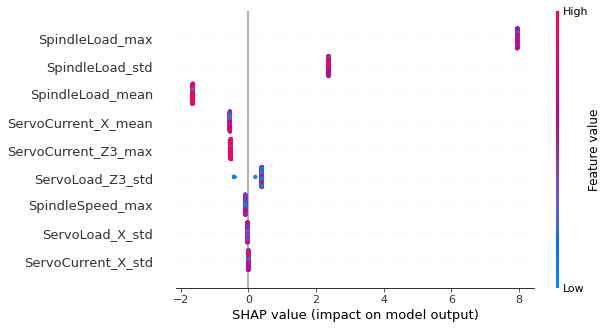

<Figure size 432x288 with 0 Axes>

In [34]:
shap.plots.beeswarm(shap_v)
plt.savefig('shap3.png')

invalid value encountered in true_divide
invalid value encountered in true_divide


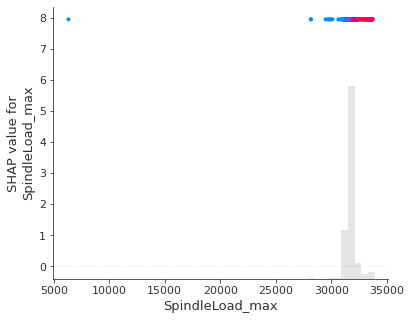

In [39]:
shap.plots.scatter(shap_v[:,'SpindleLoad_max'], color=shap_v)

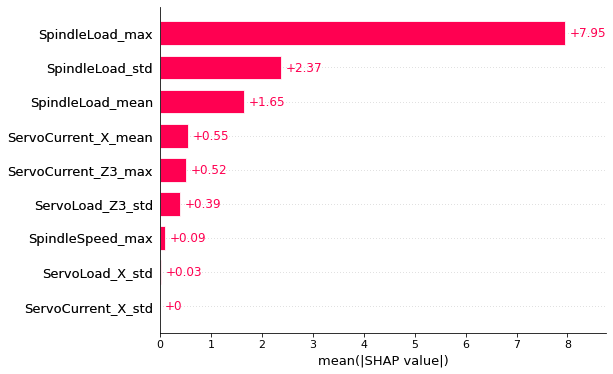

<Figure size 432x288 with 0 Axes>

In [35]:
shap.plots.bar(shap_v)
plt.savefig('shap4.png')